In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline
pd.options.display.max_rows = 68
pd.options.display.max_columns = 68

In [472]:
# read the sequences file
arquivo = 'hikoyu_fasta.txt'

file_content = open(arquivo, "r")

all_lines = file_content.readlines();

sequences = {}
sequences_info = {}
description = ''

for line in all_lines:
    
    sequence = []
    
    if ">" in line:
        description = line[1:line.find('.') + 2 ]
        sequence = []
        sequences[description] = ''
    else:
        sequences[description]+= line.replace('\n', '').strip() 
        
file_content.close()

In [479]:
len(re.findall('(?=A)', sequences[description]))

8927

In [481]:
#count A,T,C,G,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,CT,CG,GG,GA,GT,GC for each sequence

for description in sequences:
    
    sequences_info[description] = {}

    sequences_info[description]['A'] = len(re.findall('(?=A)', sequences[description]))
    sequences_info[description]['T'] = len(re.findall('(?=T)', sequences[description]))
    sequences_info[description]['C'] = len(re.findall('(?=C)', sequences[description]))
    sequences_info[description]['G'] = len(re.findall('(?=G)', sequences[description]))
    sequences_info[description]['N'] = len(re.findall('(?=N)', sequences[description]))
        
    sequences_info[description]['AA'] = len(re.findall('(?=AA)', sequences[description]))
    sequences_info[description]['AT'] = len(re.findall('(?=AT)', sequences[description]))
    sequences_info[description]['AC'] = len(re.findall('(?=AC)', sequences[description]))
    sequences_info[description]['AG'] = len(re.findall('(?=AG)', sequences[description]))
    
    sequences_info[description]['TA'] = len(re.findall('(?=TA)', sequences[description]))
    sequences_info[description]['TT'] = len(re.findall('(?=TT)', sequences[description]))
    sequences_info[description]['TC'] = len(re.findall('(?=TC)', sequences[description]))
    sequences_info[description]['TG'] = len(re.findall('(?=TG)', sequences[description]))
    
    sequences_info[description]['CA'] = len(re.findall('(?=CA)', sequences[description]))
    sequences_info[description]['CT'] = len(re.findall('(?=CT)', sequences[description]))
    sequences_info[description]['CC'] = len(re.findall('(?=CC)', sequences[description]))
    sequences_info[description]['CG'] = len(re.findall('(?=CG)', sequences[description]))
    
    sequences_info[description]['GA'] = len(re.findall('(?=GA)', sequences[description]))
    sequences_info[description]['GT'] = len(re.findall('(?=GT)', sequences[description]))
    sequences_info[description]['GC'] = len(re.findall('(?=GC)', sequences[description]))
    sequences_info[description]['GG'] = len(re.findall('(?=GG)', sequences[description]))
    

In [483]:
#calc dinucleotideo bias

for description in sequences:
    
    sequences_info[description]['SIZE'] = len( sequences[description] )
    fA = sequences_info[description]['A'] / sequences_info[description]['SIZE'] 
    fT = sequences_info[description]['T'] / sequences_info[description]['SIZE']
    fC = sequences_info[description]['C'] / sequences_info[description]['SIZE']
    fG = sequences_info[description]['G'] / sequences_info[description]['SIZE'] 
        
    fAA = sequences_info[description]['AA'] / sequences_info[description]['SIZE']      
    fAT = sequences_info[description]['AT'] / sequences_info[description]['SIZE']       
    fAC = sequences_info[description]['AC'] / sequences_info[description]['SIZE']       
    fAG = sequences_info[description]['AG'] / sequences_info[description]['SIZE']    
      
    fTA = sequences_info[description]['TA'] / sequences_info[description]['SIZE']       
    fTT = sequences_info[description]['TT'] / sequences_info[description]['SIZE']       
    fTC = sequences_info[description]['TC'] / sequences_info[description]['SIZE']       
    fTG = sequences_info[description]['TG'] / sequences_info[description]['SIZE']      

    fCA = sequences_info[description]['CA'] / sequences_info[description]['SIZE']       
    fCT = sequences_info[description]['CT'] / sequences_info[description]['SIZE']       
    fCC = sequences_info[description]['CC'] / sequences_info[description]['SIZE']       
    fCG = sequences_info[description]['CG'] / sequences_info[description]['SIZE']       

    fGA = sequences_info[description]['GA'] / sequences_info[description]['SIZE']       
    fGT = sequences_info[description]['GT'] / sequences_info[description]['SIZE']       
    fGC = sequences_info[description]['GC'] / sequences_info[description]['SIZE']       
    fGG = sequences_info[description]['GG'] / sequences_info[description]['SIZE']
        
   # sequences_info[description]['fA'] = fA
    sequences_info[description]['fT'] = fT
    sequences_info[description]['fC'] = fC
    sequences_info[description]['fG'] = fG
       
    sequences_info[description]['pAA'] = fAA/(fA*fA)
    sequences_info[description]['pAT'] = fAT/(fA*fT)
    sequences_info[description]['pAC'] = fAC/(fA*fC)
    sequences_info[description]['pAG'] = fAG/(fA*fG)

    sequences_info[description]['pTA'] = fTA/(fT*fA)
    sequences_info[description]['pTT'] = fTT/(fT*fT)
    sequences_info[description]['pTC'] = fTC/(fT*fC)
    sequences_info[description]['pTG'] = fTG/(fT*fG)
      
    sequences_info[description]['pCA'] = fCA/(fC*fA)
    sequences_info[description]['pCT'] = fCT/(fC*fT)
    sequences_info[description]['pCC'] = fCC/(fC*fC)
    sequences_info[description]['pCG'] = fCG/(fC*fG)

    sequences_info[description]['pGA'] = fGA/(fG*fA)
    sequences_info[description]['pGT'] = fGT/(fG*fT)
    sequences_info[description]['pGC'] = fGC/(fG*fC)
    sequences_info[description]['pGG'] = fGG/(fG*fG)

In [484]:
#key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'
key = 'MG772933.1'
sequences_info[key]

{'A': 8740,
 'T': 9468,
 'C': 5574,
 'G': 6020,
 'N': 0,
 'AA': 2714,
 'AT': 2270,
 'AC': 1991,
 'AG': 1764,
 'TA': 2279,
 'TT': 3128,
 'TC': 1462,
 'TG': 2599,
 'CA': 2086,
 'CT': 2089,
 'CC': 895,
 'CG': 504,
 'GA': 1660,
 'GT': 1981,
 'GC': 1226,
 'GG': 1153,
 'SIZE': 29802,
 'fT': 0.31769679887255886,
 'fC': 0.1870344272196497,
 'fG': 0.20199986578082008,
 'pAA': 1.0588449957846564,
 'pAT': 0.817526022860093,
 'pAC': 1.2179747175304763,
 'pAG': 0.99916236496195,
 'pTA': 0.820767315461741,
 'pTT': 1.0399097647576014,
 'pTC': 0.8255959795228889,
 'pTG': 1.3589295714748895,
 'pCA': 1.2760900355442357,
 'pCT': 1.1796648435179993,
 'pCC': 0.8584885692954718,
 'pCG': 0.44762310060830596,
 'pGA': 0.9402548332408373,
 'pGT': 1.0357981843369588,
 'pGC': 1.088860955051157,
 'pGG': 0.9481602300195361}

In [486]:
key = 'MT126808.1'
#key = '>MN996532.1 Bat coronavirus RaTG13, complete genome\n'
sequences_info[key]

{'A': 8927,
 'T': 9596,
 'C': 5492,
 'G': 5861,
 'N': 0,
 'AA': 2853,
 'AT': 2309,
 'AC': 2022,
 'AG': 1742,
 'TA': 2377,
 'TT': 3219,
 'TC': 1413,
 'TG': 2587,
 'CA': 2084,
 'CT': 2080,
 'CC': 888,
 'CG': 440,
 'GA': 1612,
 'GT': 1988,
 'GC': 1169,
 'GG': 1092,
 'SIZE': 29876,
 'fT': 0.3211942696478779,
 'fC': 0.18382648279555497,
 'fG': 0.1961775338063998,
 'pAA': 1.0695797029561398,
 'pAT': 0.8052868542879387,
 'pAC': 1.2321612274554201,
 'pAG': 0.9947028110832509,
 'pTA': 0.8290025347087183,
 'pTT': 1.0443905868795895,
 'pTC': 0.8010208945399986,
 'pTG': 1.3742220692962055,
 'pCA': 1.2699426300776933,
 'pCT': 1.179139037964046,
 'pCC': 0.8795780023542156,
 'pCG': 0.408387910606397,
 'pGA': 0.9204712580173366,
 'pGT': 1.0560314935295156,
 'pGC': 1.0850124261338139,
 'pGG': 0.9497332577108168}

In [487]:
#creating a dataframe
df_original = pd.DataFrame.from_dict(sequences_info, orient='index', columns=[ 'fT', 'fC', 'fG',
                                                                     'pAA','pAT', 'pAC', 'pAG',
                                                                     'pTA','pTT', 'pTC', 'pTG',
                                                                     'pCA','pCT', 'pCC', 'pCG',
                                                                     'pGA','pGT', 'pGC', 'pGG'])

In [488]:
df_original

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTT,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.321261,0.183798,0.196094,1.069880,0.804704,1.233320,0.994195,0.828783,1.043637,0.801163,1.375814,1.271137,1.180183,0.876710,0.407151,0.919301,1.057255,1.085735,0.948825
LC522972.1,0.321139,0.183714,0.196231,1.070566,0.805064,1.231756,0.993985,0.828773,1.043705,0.801596,1.375051,1.269543,1.179985,0.879607,0.407571,0.919807,1.056914,1.084379,0.950018
LC522973.1,0.321139,0.183714,0.196231,1.070566,0.804715,1.232365,0.993985,0.828076,1.043705,0.802163,1.375582,1.270762,1.179418,0.879607,0.406642,0.919807,1.057976,1.082523,0.950018
LC522974.1,0.321106,0.183747,0.196231,1.070566,0.804799,1.232141,0.993985,0.828162,1.043598,0.802101,1.375725,1.270531,1.179893,0.879287,0.406568,0.919807,1.057556,1.083254,0.950018
LC522975.1,0.321139,0.183747,0.196198,1.070566,0.805064,1.232141,0.993584,0.828076,1.043380,0.802017,1.376348,1.270531,1.179771,0.879287,0.406638,0.919964,1.057626,1.083438,0.949473
LC528232.1,0.321216,0.183700,0.196141,1.071380,0.804848,1.231354,0.994124,0.828530,1.043990,0.801388,1.375315,1.269110,1.179978,0.879032,0.407462,0.919978,1.056302,1.085947,0.949264
LC528233.1,0.321082,0.183901,0.196274,1.069822,0.805375,1.232054,0.994114,0.829084,1.043562,0.800280,1.376012,1.269795,1.179748,0.881070,0.406740,0.920539,1.056552,1.084022,0.949706
LR757995.1,0.321003,0.183784,0.196204,1.071609,0.804269,1.231755,0.993442,0.827637,1.043502,0.802925,1.376104,1.270133,1.180272,0.878119,0.407554,0.919833,1.057724,1.083406,0.949606
LR757996.1,0.320945,0.183742,0.196230,1.071600,0.804323,1.231901,0.993198,0.828041,1.043690,0.801658,1.376351,1.269675,1.180913,0.877650,0.407648,0.919607,1.057382,1.084584,0.949479
LR757997.1,0.207602,0.123180,0.129441,1.645032,1.212204,1.873220,1.503911,1.250820,1.598796,1.241487,2.084291,1.935473,1.799025,1.273800,0.695727,1.389468,1.611970,1.681695,1.441941


In [489]:
df_original.describe()

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTT,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.319309,0.182925,0.195282,1.079306,0.810833,1.241412,1.001435,0.834710,1.051696,0.808830,1.385848,1.279161,1.189883,0.884434,0.412351,0.927143,1.065190,1.092712,0.957224
std,0.013758,0.007366,0.008135,0.069664,0.049431,0.077794,0.061860,0.051233,0.067356,0.053360,0.085994,0.080818,0.075048,0.048080,0.035220,0.056974,0.067363,0.072508,0.059670
min,0.207602,0.123180,0.129441,1.058845,0.803061,1.217975,0.989006,0.820767,1.032168,0.800280,1.358930,1.253839,1.179040,0.856509,0.406047,0.917597,1.035798,1.076066,0.948160
25%,0.320960,0.183711,0.196145,1.069877,0.804298,1.231419,0.993399,0.828135,1.043422,0.801322,1.375199,1.268718,1.179910,0.878852,0.407268,0.919420,1.056998,1.083279,0.949444
50%,0.321091,0.183756,0.196201,1.070605,0.804640,1.232227,0.993985,0.828701,1.043719,0.801606,1.375433,1.269397,1.180281,0.879269,0.407477,0.919809,1.057453,1.083753,0.950018
75%,0.321143,0.183824,0.196233,1.071603,0.805123,1.233009,0.994466,0.829047,1.044025,0.802116,1.376021,1.270245,1.180722,0.879998,0.407726,0.920449,1.057699,1.084358,0.950278
max,0.321308,0.187034,0.202000,1.645032,1.212204,1.873220,1.503911,1.250820,1.598796,1.241487,2.084291,1.935473,1.799025,1.273800,0.695727,1.389468,1.611970,1.681695,1.441941


In [490]:
#standardization
#Useful: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_original.values)
df_std = pd.DataFrame(std_data, index=df_original.index, columns=df_original.columns)

In [491]:
df_std

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTT,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.142953,0.119317,0.100554,-0.136320,-0.124900,-0.104789,-0.117913,-0.116562,-0.120541,-0.144760,-0.117549,-0.100027,-0.130205,-0.161850,-0.148760,-0.138657,-0.118666,-0.096936,-0.141811
LC522972.1,0.134037,0.107810,0.117619,-0.126394,-0.117571,-0.125047,-0.121333,-0.116751,-0.119534,-0.136585,-0.126496,-0.119892,-0.132860,-0.101146,-0.136743,-0.129721,-0.123763,-0.115768,-0.121665
LC522973.1,0.134037,0.107810,0.117619,-0.126394,-0.124677,-0.117154,-0.121333,-0.130463,-0.119534,-0.125874,-0.120274,-0.104698,-0.140476,-0.101146,-0.163299,-0.129721,-0.107877,-0.141567,-0.121665
LC522974.1,0.131586,0.112387,0.117619,-0.126394,-0.122968,-0.120061,-0.121333,-0.128766,-0.121134,-0.127054,-0.118594,-0.107583,-0.134095,-0.107860,-0.165418,-0.129721,-0.114172,-0.131410,-0.121665
LC522975.1,0.134037,0.112387,0.113474,-0.126394,-0.117571,-0.120061,-0.127866,-0.130463,-0.124388,-0.128633,-0.111301,-0.107583,-0.135746,-0.107860,-0.163434,-0.126947,-0.113123,-0.128842,-0.130871
LC528232.1,0.139651,0.105939,0.106397,-0.114621,-0.121973,-0.130250,-0.119060,-0.121526,-0.115269,-0.140515,-0.123396,-0.125287,-0.132957,-0.113195,-0.139850,-0.126685,-0.132925,-0.093993,-0.134403
LC528233.1,0.129856,0.133381,0.122963,-0.137152,-0.111222,-0.121184,-0.119227,-0.110646,-0.121663,-0.161419,-0.115235,-0.116758,-0.136045,-0.070488,-0.160502,-0.116768,-0.129179,-0.120728,-0.126929
LR757995.1,0.124052,0.117435,0.114208,-0.111310,-0.133764,-0.125052,-0.130167,-0.139087,-0.122567,-0.111488,-0.114154,-0.112536,-0.129018,-0.132326,-0.137230,-0.129260,-0.111653,-0.129297,-0.128621
LR757996.1,0.119845,0.111643,0.117462,-0.111441,-0.132665,-0.123161,-0.134144,-0.131137,-0.119750,-0.135405,-0.111268,-0.118255,-0.120407,-0.142158,-0.134543,-0.133258,-0.116772,-0.112926,-0.130768
LR757997.1,-8.180074,-8.171014,-8.153627,8.181203,8.180234,8.181916,8.183245,8.182350,8.182936,8.168478,8.182346,8.181278,8.177022,8.158442,8.105665,8.175065,8.177318,8.183379,8.183621


In [492]:
#create a distance matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

distance_matrix = pd.DataFrame(
    squareform(pdist(df_std, metric='euclidean')),
    columns = df_std.index,
    index = df_std.index
)


In [493]:
distance_matrix

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,0.000000,0.079516,0.089120,0.078984,0.076222,0.070429,0.108743,0.077222,0.062670,36.172605,0.093412,1.717789,0.141580,0.071168,0.096749,0.074604,0.080852,0.080852,0.077716,0.111494,0.086788,0.045918,0.100989,0.077348,0.079624,0.071580,0.753087,0.074977,0.176096,0.076513,0.123743,0.123672,0.136183,0.098172,0.079200,0.420992,0.074604,0.074604,0.089669,0.089669,0.095055,0.060536,0.071709,0.098784,0.124956,0.093588,0.087312,0.154058,0.075953,0.077107,0.094197,0.055543,0.075557,0.075782,0.082696,0.080691,0.066037,0.091373,0.084832,0.119480,0.087620,0.072505,0.086502,0.140693,0.140693,0.143513,0.140693,0.068781
LC522972.1,0.079516,0.000000,0.048645,0.041691,0.043650,0.036480,0.058605,0.059005,0.057205,36.160585,0.076427,1.712204,0.098082,0.104776,0.058788,0.030229,0.022652,0.022652,0.034835,0.050205,0.020226,0.077672,0.046625,0.057557,0.053768,0.054371,0.775748,0.040226,0.129632,0.081117,0.071617,0.059544,0.087287,0.042581,0.022210,0.407113,0.030229,0.030229,0.040812,0.040812,0.019366,0.062045,0.028427,0.031055,0.104215,0.033221,0.045915,0.119541,0.100680,0.061628,0.058530,0.075166,0.046516,0.061552,0.055546,0.025646,0.037387,0.028339,0.029128,0.062319,0.059584,0.066113,0.046239,0.108595,0.108595,0.114112,0.108595,0.042558
LC522973.1,0.089120,0.048645,0.000000,0.017011,0.024680,0.071017,0.069999,0.055139,0.070472,36.166281,0.089800,1.732140,0.108606,0.102856,0.054167,0.031751,0.045245,0.045245,0.044796,0.054590,0.054622,0.093566,0.063675,0.068515,0.064480,0.068778,0.781634,0.028279,0.132493,0.077992,0.095590,0.066561,0.097894,0.060573,0.048028,0.410714,0.031751,0.031751,0.054284,0.054284,0.054972,0.069320,0.052404,0.058479,0.103723,0.045195,0.076423,0.121761,0.096789,0.059989,0.075248,0.083267,0.071132,0.079226,0.033471,0.042893,0.053697,0.045611,0.050470,0.076915,0.092948,0.080124,0.082180,0.115947,0.115947,0.119684,0.115947,0.036068
LC522974.1,0.078984,0.041691,0.017011,0.000000,0.016460,0.060764,0.065545,0.049136,0.060294,36.167222,0.082147,1.728768,0.105822,0.094949,0.048142,0.028786,0.038741,0.038741,0.036395,0.054493,0.048880,0.084571,0.058922,0.062613,0.057798,0.060437,0.773192,0.017956,0.130478,0.074273,0.091859,0.068136,0.095972,0.055567,0.041781,0.410696,0.028786,0.028786,0.053238,0.053238,0.050631,0.063234,0.042706,0.056102,0.097966,0.041859,0.067932,0.119528,0.092753,0.056418,0.071523,0.076350,0.065254,0.073658,0.028185,0.037677,0.045465,0.043675,0.044209,0.072811,0.085196,0.074221,0.077222,0.114383,0.114383,0.118859,0.114383,0.035388
LC522975.1,0.076222,0.043650,0.024680,0.016460,0.000000,0.058635,0.064831,0.048921,0.058761,36.167499,0.078457,1.729394,0.107090,0.092263,0.051612,0.033819,0.042810,0.042810,0.043591,0.056047,0.048617,0.080841,0.061104,0.064402,0.057463,0.059855,0.774359,0.028872,0.132692,0.074805,0.091805,0.070799,0.097612,0.057870,0.042198,0.411262,0.033819,0.033819,0.055003,0.055003,0.051780,0.065928,0.046332,0.057678,0.096340,0.049650,0.070024,0.121495,0.091797,0.059101,0.075013,0.076170,0.063625,0.071197,0.033814,0.042854,0.049555,0.047211,0.051738,0.074705,0.085490,0.070387,0.077763,0.114844,0.114844,0.119906,0.114844,0.038541
LC528232.1,0.070429,0.036480,0.071017,0.060764,0.058635,0.000000,0.075548,0.065700,0.054634,36.162239,0.066276,1.716705,0.096974,0.

In [494]:
#create an adjacency matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

adj_matrix_0_018 = distance_matrix.copy()
adj_matrix_0_036 = distance_matrix.copy()
adj_matrix_0_055 = distance_matrix.copy()
adj_matrix_0_075 = distance_matrix.copy()
adj_matrix_2_0   = distance_matrix.copy()

In [495]:
#Defining functions to get nodes and edges
def get_nodes(matrix):
    nodes = []
    for i in range(len(matrix.values)):
            nodes.append((i))
    return nodes

def get_edges(matrix):
    edges = []
    for i in range(len(matrix.values)):
        for j in range(len(matrix.values)):
            if(i != j and matrix.values[i][j] == 1):
                edges.append((i,j))
    return edges

In [496]:
#applying the thresholds
adj_matrix_0_018 = adj_matrix_0_018.applymap(lambda x: 1 if x <= 0.018 else 0)

In [497]:
adj_matrix_0_018

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


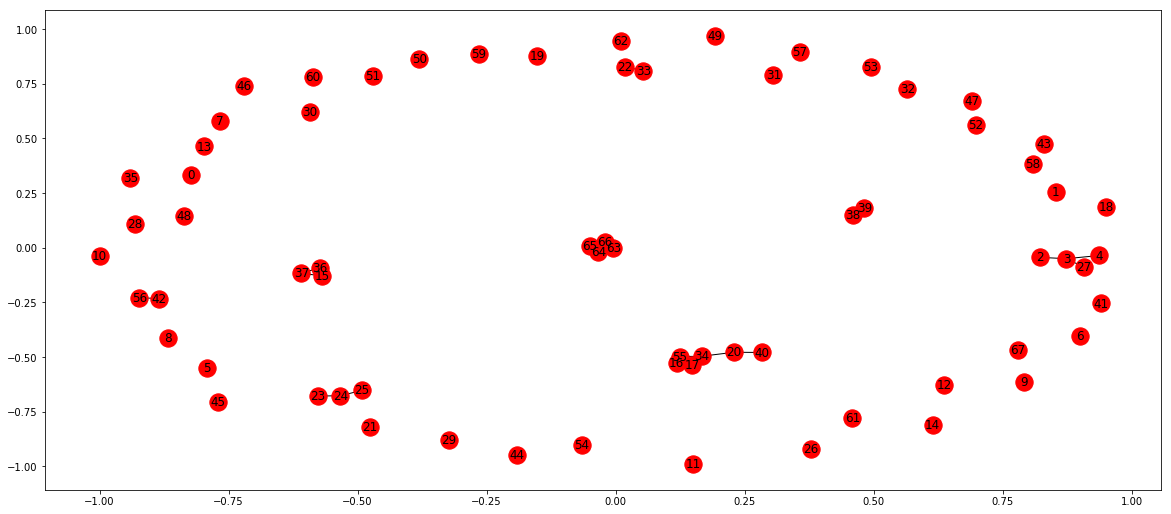

In [498]:
#creating graph
G = nx.Graph() 
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_018)) 
G.add_edges_from(get_edges(adj_matrix_0_018)) 
  
# First Graph created 
plt.subplot(311) 
nx.draw_networkx(G) 

In [499]:
adj_matrix_0_036 = adj_matrix_0_036.applymap(lambda x: 1 if x <= 0.036 else 0)

In [500]:
adj_matrix_0_036

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
LC522975.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


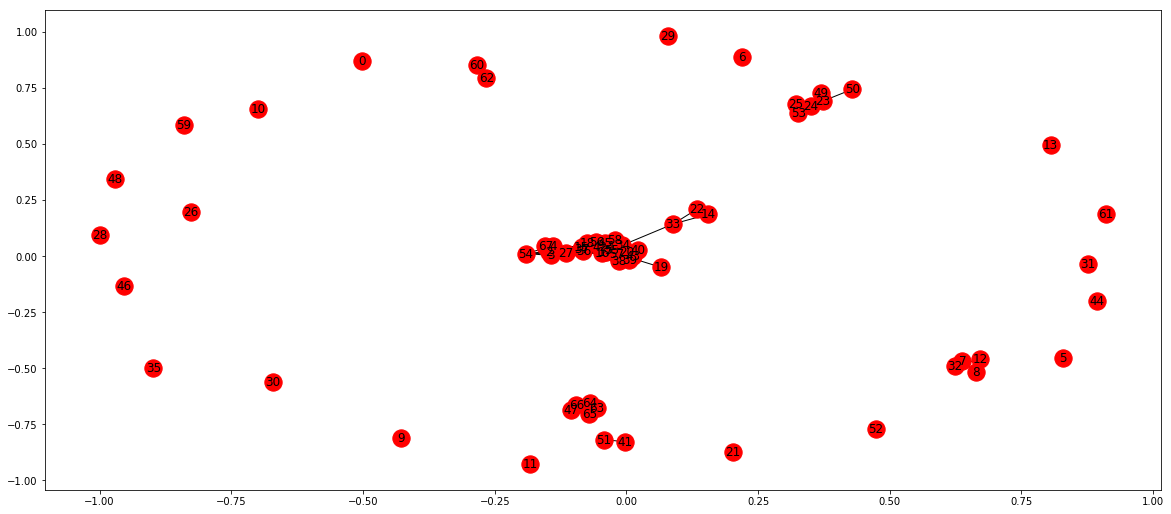

In [501]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_036)) 
G.add_edges_from(get_edges(adj_matrix_0_036)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [502]:
adj_matrix_0_055 = adj_matrix_0_055.applymap(lambda x: 1 if x <= 0.055 else 0)

In [503]:
adj_matrix_0_055

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1
LC522973.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1
LC522974.1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1
LC522975.1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1
LC528232.1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
LR757996.1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


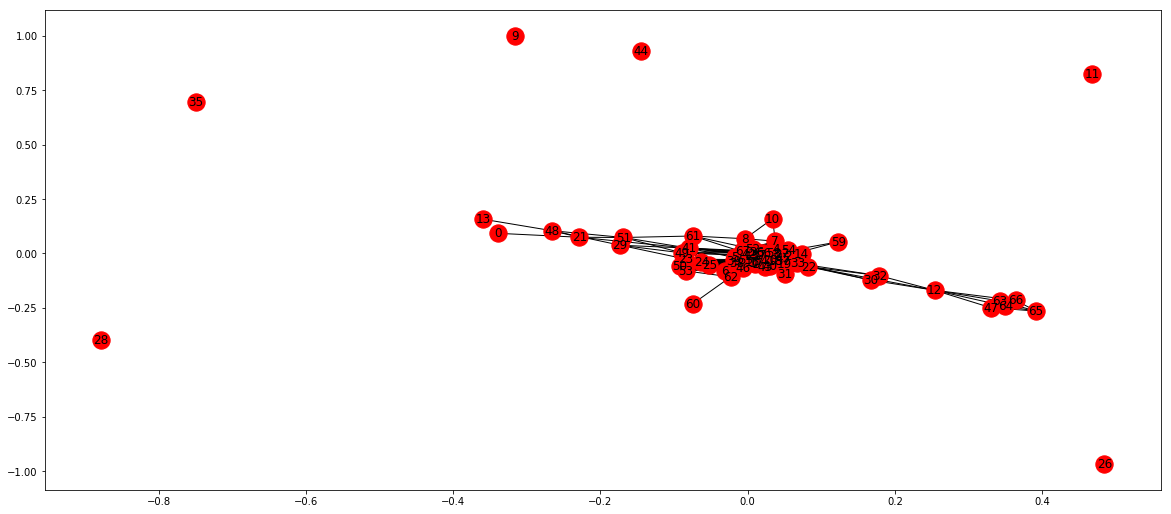

In [504]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_055)) 
G.add_edges_from(get_edges(adj_matrix_0_055)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [505]:
adj_matrix_0_075 = adj_matrix_0_075.applymap(lambda x: 1 if x <= 0.075 else 0)

In [506]:
adj_matrix_0_075

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
LC522972.1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
LC522973.1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1
LC522974.1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1
LC522975.1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1
LC528232.1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
LC528233.1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0
LR757995.1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,1
LR757996.1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,1
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


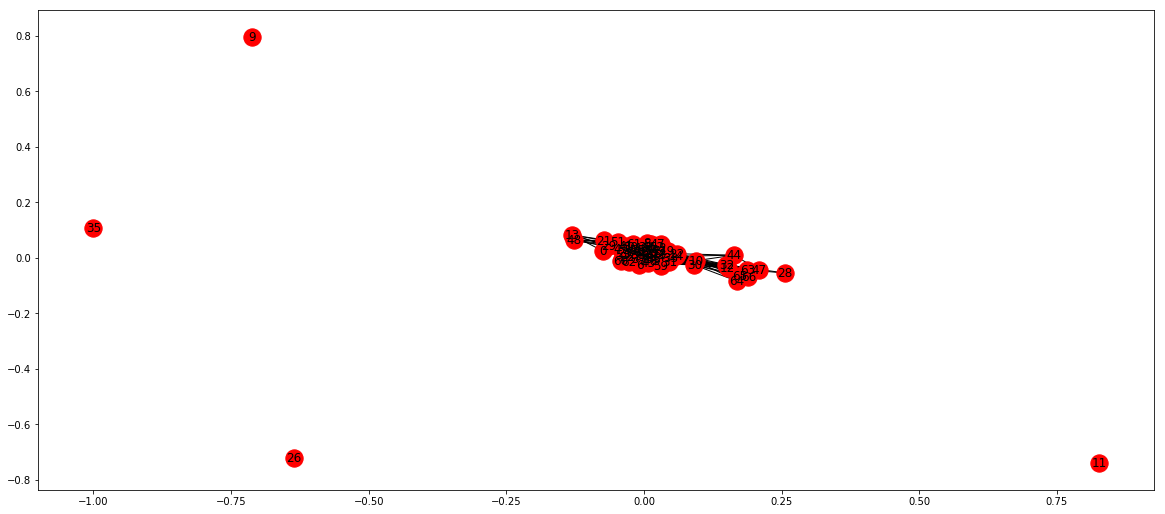

In [507]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_075)) 
G.add_edges_from(get_edges(adj_matrix_0_075)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [508]:
adj_matrix_2_0 = adj_matrix_2_0.applymap(lambda x: 1 if x <= 2.0 else 0)

In [509]:
adj_matrix_2_0

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522972.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522973.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522974.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522975.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528232.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528233.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757995.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757996.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


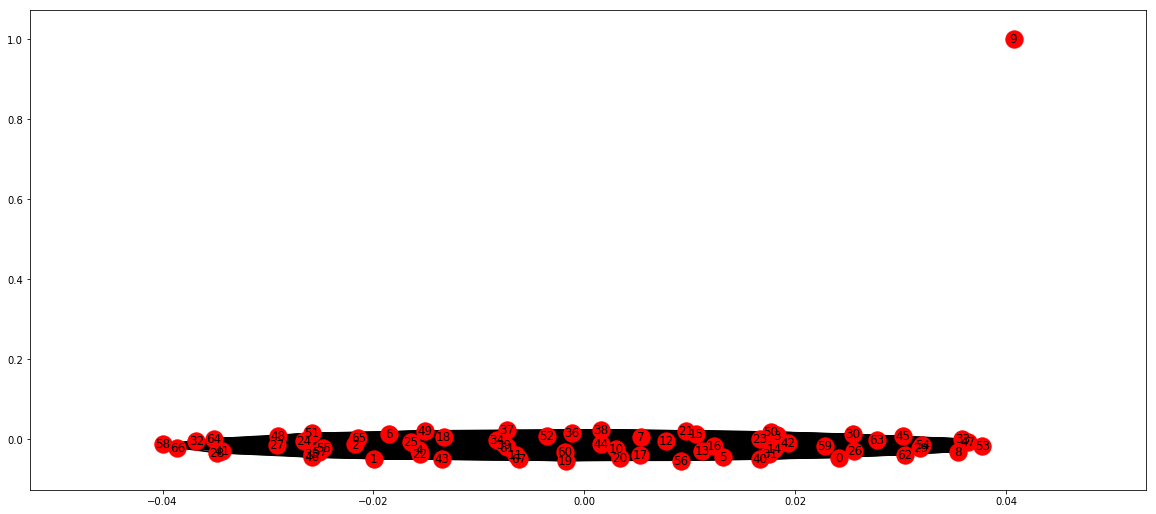

In [510]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_2_0)) 
G.add_edges_from(get_edges(adj_matrix_2_0)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 